In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline


In [2]:
netflix_overall = pd.read_csv('netflix_titles.csv')

In [4]:
netflix_overall.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
netflix_overall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
netflix_overall.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
netflix_movies = netflix_overall[netflix_overall['type']=='Movie'].copy()

In [8]:
netflix_shows = netflix_overall[netflix_overall['type']=='TV Show'].copy()

In [9]:
netflix_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


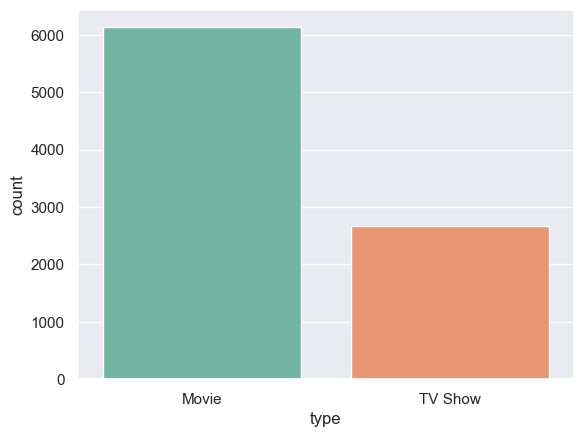

In [10]:
sns.set(style = 'darkgrid')
ax = sns.countplot(x='type',data=netflix_overall, palette='Set2')

# Популярное время длительности

In [12]:
topdirs = pd.value_counts(netflix_overall['duration'])
topdirs

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: duration, Length: 220, dtype: int64

# Анализ фильмов

Какой месяц, самый привлекательный для релиза контента?

In [15]:
netflix_overall.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [18]:
netflix_date = netflix_shows[['date_added']].dropna()
netflix_date.isna().sum()

date_added    0
dtype: int64

In [19]:
netflix_date.head()

,date_added
1,"September 24, 2021"
2,"September 24, 2021"
3,"September 24, 2021"
4,"September 24, 2021"
5,"September 24, 2021"


In [20]:
netflix_date['year'] = netflix_date['date_added'].apply(lambda x:x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x:x.split(' ')[0])

In [21]:
netflix_date['year']

1       2021
2       2021
3       2021
4       2021
5       2021
        ... 
8795    2018
8796    2017
8797    2018
8800    2016
8803    2019
Name: year, Length: 2666, dtype: object

In [22]:
netflix_date.head()

,date_added,year,month
1,"September 24, 2021",2021,September
2,"September 24, 2021",2021,September
3,"September 24, 2021",2021,September
4,"September 24, 2021",2021,September
5,"September 24, 2021",2021,September


In [26]:
netflix_date.sort_values(by=['year','month'])

,date_added,year,month
6611,"February 4, 2008",2008,February
6885,"October 8, 2013",2013,
5940,"August 2, 2013",2013,August
7112,"March 31, 2013",2013,March
7908,"October 14, 2013",2013,October
...,...,...,...
153,"September 1, 2021",2021,September
154,"September 1, 2021",2021,September
160,"September 1, 2021",2021,September
165,"September 1, 2021",2021,September


Лучший месяц для сериала 

In [24]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
df

year,2008,2013,2014,2015,2016,2017,2018,2019,2020,2021
month,,,,,,,,,,
December,0.0,0.0,0.0,4.0,43.0,35.0,56.0,44.0,68.0,0.0
November,0.0,0.0,2.0,1.0,16.0,27.0,36.0,66.0,51.0,0.0
October,0.0,1.0,0.0,4.0,19.0,28.0,44.0,63.0,51.0,0.0
September,0.0,1.0,0.0,0.0,17.0,32.0,42.0,36.0,53.0,65.0
August,0.0,1.0,0.0,0.0,11.0,33.0,33.0,44.0,47.0,61.0
July,0.0,0.0,0.0,2.0,9.0,30.0,25.0,57.0,43.0,88.0
June,0.0,0.0,0.0,1.0,7.0,27.0,27.0,46.0,41.0,83.0
May,0.0,0.0,0.0,0.0,2.0,22.0,25.0,48.0,52.0,38.0
April,0.0,0.0,1.0,4.0,7.0,25.0,27.0,42.0,50.0,53.0


Vizualize 

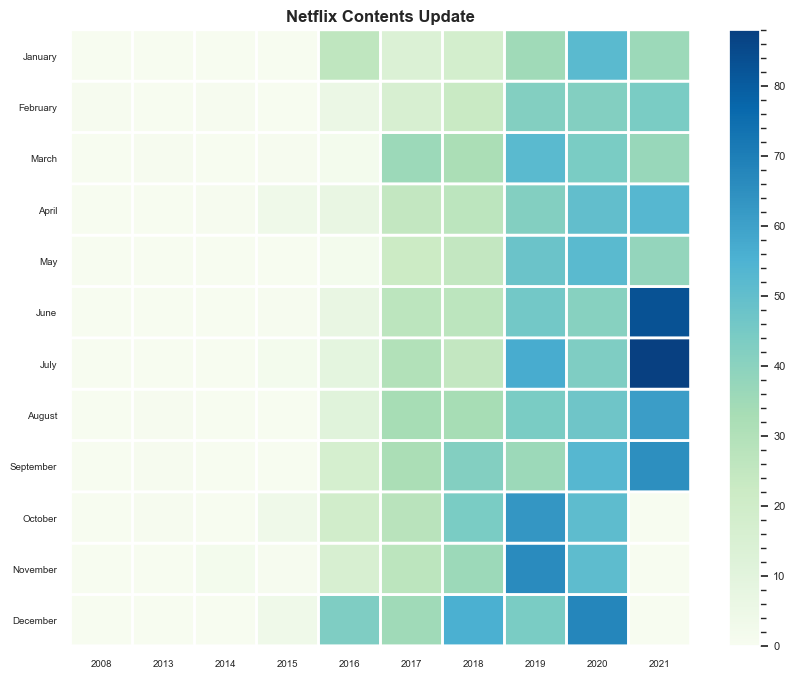

In [25]:
plt.figure(figsize=(10, 8), dpi=100)
plt.pcolor(df, cmap='GnBu', edgecolors='white', linewidths=2)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7)
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7)

plt.title('Netflix Contents Update', fontsize=12, fontweight='bold')
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

# Анализ рейтингов фильмов

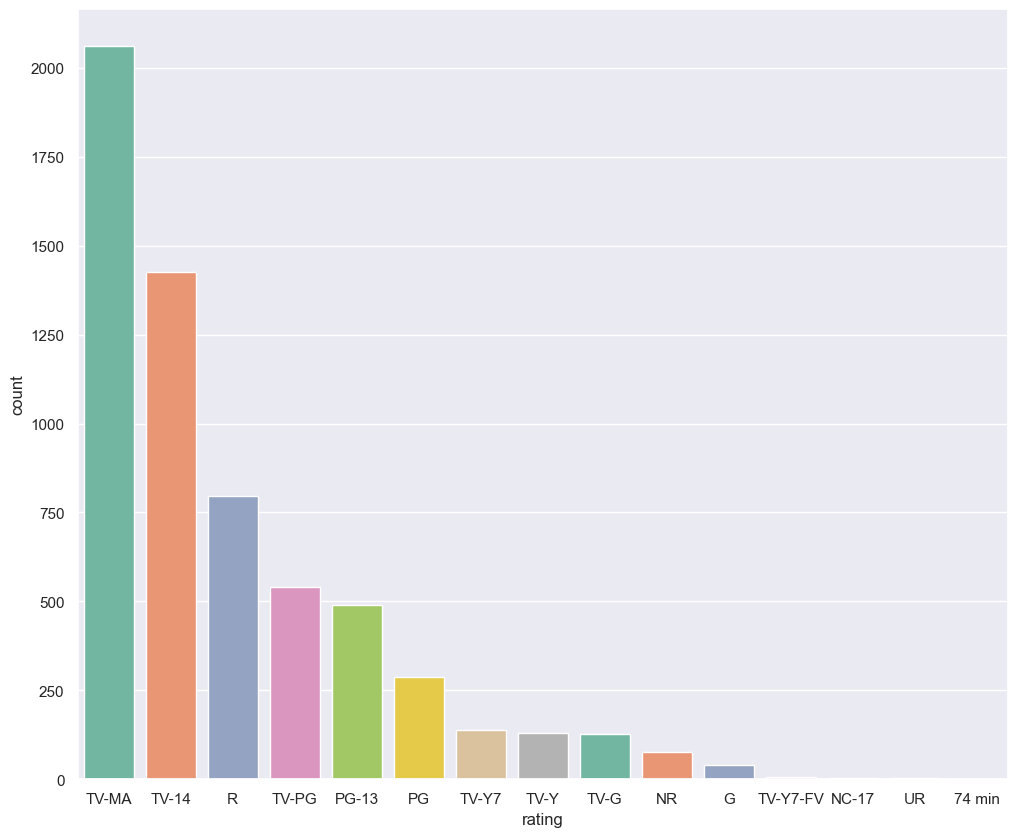

In [28]:
plt.figure(figsize=(12,10))
sns.set(style='darkgrid')
ax = sns.countplot(x='rating', data=netflix_movies, palette='Set2', 
                   order=netflix_movies['rating'].value_counts().index[0:15] )

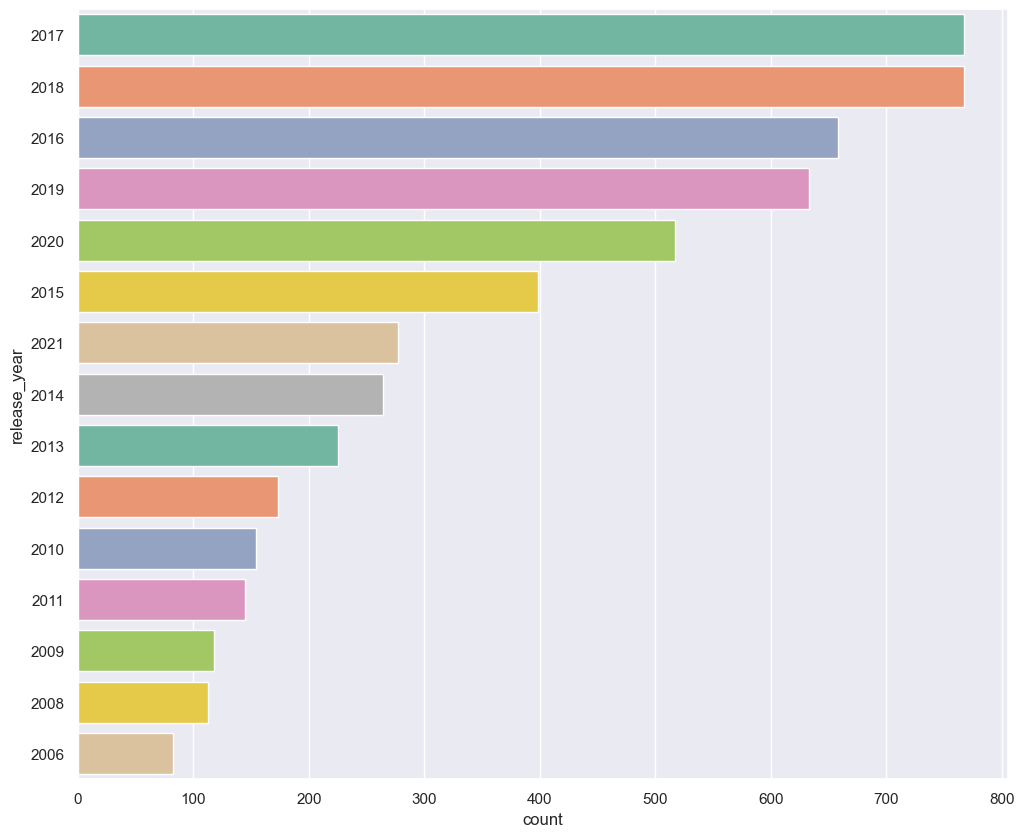

In [32]:
plt.figure(figsize=(12,10))
sns.set(style='darkgrid')
ax = sns.countplot(y='release_year', data=netflix_movies, palette='Set2',
                  order = netflix_movies['release_year'].value_counts().index[0:15])

# Топ 10 стран, которые выпускают фильмы

In [33]:
netflix_movies.isna().sum()

show_id           0
type              0
title             0
director        188
cast            475
country         440
date_added        0
release_year      0
rating            2
duration          3
listed_in         0
description       0
dtype: int64

In [34]:
#440 nann

In [37]:
netflix_movies['country'].fillna('Unknown').isna().sum()

0

In [42]:
netflix_movies['country'].fillna('Unknown',inplace = True)
netflix_movies.isna().sum()

show_id           0
type              0
title             0
director        188
cast            475
country           0
date_added        0
release_year      0
rating            2
duration          3
listed_in         0
description       0
dtype: int64

In [43]:
netflix_movies[netflix_movies['country']=='Unknown']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
13,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,"Klara Castanho, Lucca Picon, Júlia Gomes, Marc...",Unknown,"September 22, 2021",2021,TV-PG,91 min,"Children & Family Movies, Comedies",When the clever but socially-awkward Tetê join...
16,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,"Pedro de Echave García, Pablo Azorín Williams",NaN,Unknown,"September 22, 2021",2020,TV-MA,67 min,"Documentaries, International Movies",Declassified documents reveal the post-WWII li...
18,s19,Movie,Intrusion,Adam Salky,"Freida Pinto, Logan Marshall-Green, Robert Joh...",Unknown,"September 22, 2021",2021,TV-14,94 min,Thrillers,After a deadly home invasion at a couple’s new...
22,s23,Movie,Avvai Shanmughi,K.S. Ravikumar,"Kamal Hassan, Meena, Gemini Ganesan, Heera Raj...",Unknown,"September 21, 2021",1996,TV-PG,161 min,"Comedies, International Movies",Newly divorced and denied visitation rights wi...
...,...,...,...,...,...,...,...,...,...,...,...,...
8585,s8586,Movie,Three-Quarters Decent,Mohamed Hamdy,"Mohamed Ragab, Lamitta Frangieh, Mohsen Mansou...",Unknown,"June 20, 2019",2010,TV-14,96 min,"Comedies, Dramas, International Movies","Determined to fight corruption in his country,..."
8602,s8603,Movie,Tom and Jerry: The Magic Ring,Phil Roman,"Richard Kind, Dana Hill, Anndi McAfee, Tony Ja...",Unknown,"December 15, 2019",2001,TV-Y7,60 min,"Children & Family Movies, Comedies",When a young wizard leaves Tom to guard his pr...
8622,s8623,Movie,Tremors 2: Aftershocks,S.S. Wilson,"Fred Ward, Chris Gartin, Helen Shaver, Michael...",Unknown,"January 1, 2020",1995,PG-13,100 min,"Comedies, Horror Movies, Sci-Fi & Fantasy",A rag-tag team of survivalists and scientists ...
8718,s8719,Movie,Westside vs. the World,Michael Fahey,"Ron Perlman, Louie Simmons",Unknown,"August 9, 2019",2019,TV-MA,96 min,"Documentaries, Sports Movies",A look into the journey of influential strengt...


In [44]:
netflix_movies['country'].value_counts()

United States                            2058
India                                     893
Unknown                                   440
United Kingdom                            206
Canada                                    122
                                         ... 
United Kingdom, Russia, United States       1
Paraguay, Argentina                         1
United Kingdom, Malawi                      1
Austria, Iraq, United States                1
United Arab Emirates, Jordan                1
Name: country, Length: 652, dtype: int64

Austria, Iraq, United States нужно разделить

In [47]:
countries_mov = {}

cou = list(netflix_movies['country'])
for i in cou:
    i = i.replace(' ', '')
    i = list(i.split(','))

    for j in i:
        if j in list(countries_mov.keys()):
            countries_mov[j]+=1
        else:
            countries_mov[j]=1

In [48]:
countries_mov

{'UnitedStates': 2752,
 'Unknown': 440,
 'Ghana': 5,
 'BurkinaFaso': 1,
 'UnitedKingdom': 534,
 'Germany': 182,
 'Ethiopia': 1,
 'CzechRepublic': 16,
 'India': 962,
 'France': 303,
 'China': 114,
 'Canada': 319,
 'SouthAfrica': 51,
 'Japan': 119,
 'Nigeria': 94,
 'Spain': 171,
 'Australia': 94,
 'Mexico': 111,
 'Italy': 75,
 'Romania': 14,
 'Argentina': 71,
 'Venezuela': 4,
 'HongKong': 100,
 'Nepal': 2,
 'NewZealand': 25,
 'Brazil': 66,
 'Greece': 9,
 'Colombia': 20,
 'Belgium': 78,
 'Switzerland': 18,
 'Bulgaria': 10,
 '': 6,
 'Algeria': 3,
 'Poland': 32,
 'Israel': 19,
 'SaudiArabia': 9,
 'Thailand': 46,
 'Indonesia': 86,
 'Egypt': 102,
 'Denmark': 34,
 'Kuwait': 5,
 'Netherlands': 42,
 'Singapore': 18,
 'Malaysia': 18,
 'SouthKorea': 61,
 'Vietnam': 7,
 'Hungary': 10,
 'Lebanon': 24,
 'Syria': 2,
 'Philippines': 80,
 'UnitedArabEmirates': 36,
 'Sweden': 31,
 'Qatar': 10,
 'Mauritius': 1,
 'Austria': 11,
 'Turkey': 83,
 'Russia': 11,
 'Taiwan': 19,
 'Cameroon': 1,
 'Palestine': 1,
 

In [49]:
countries_fin = sorted(countries_mov.items(),key = lambda item: countries_mov[item[0]], reverse=True)
countries_fin = countries_fin[:10]
countries_fin

[('UnitedStates', 2752),
 ('India', 962),
 ('UnitedKingdom', 534),
 ('Unknown', 440),
 ('Canada', 319),
 ('France', 303),
 ('Germany', 182),
 ('Spain', 171),
 ('Japan', 119),
 ('China', 114)]

In [51]:
names = [name for name,value in countries_fin]
names

['UnitedStates',
 'India',
 'UnitedKingdom',
 'Unknown',
 'Canada',
 'France',
 'Germany',
 'Spain',
 'Japan',
 'China']

In [52]:
values = [value for name,value in countries_fin]
values

[2752, 962, 534, 440, 319, 303, 182, 171, 119, 114]

[Text(0, 0, 'UnitedStates'),
 Text(1, 0, 'India'),
 Text(2, 0, 'UnitedKingdom'),
 Text(3, 0, 'Unknown'),
 Text(4, 0, 'Canada'),
 Text(5, 0, 'France'),
 Text(6, 0, 'Germany'),
 Text(7, 0, 'Spain'),
 Text(8, 0, 'Japan'),
 Text(9, 0, 'China')]

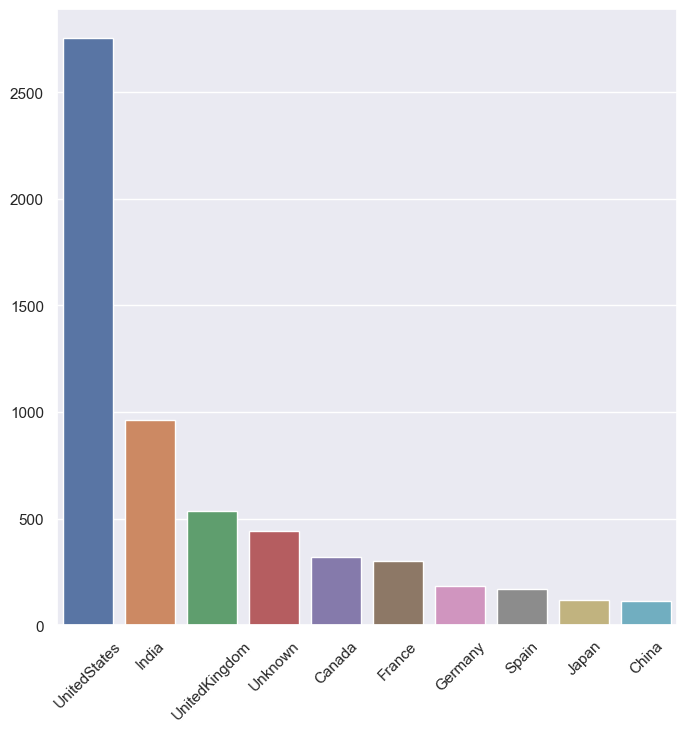

In [73]:
plt.figure(figsize=(8,8))
ax = sns.barplot(x=names, y=values)
ax.set_xticklabels(names, rotation = 45)

# Анализ жанров

In [56]:
netflix_movies['listed_in']

0                                          Documentaries
6                               Children & Family Movies
7       Dramas, Independent Movies, International Movies
9                                       Comedies, Dramas
12                          Dramas, International Movies
                              ...                       
8801             Dramas, International Movies, Thrillers
8802                      Cult Movies, Dramas, Thrillers
8804                             Comedies, Horror Movies
8805                  Children & Family Movies, Comedies
8806      Dramas, International Movies, Music & Musicals
Name: listed_in, Length: 6131, dtype: object

In [77]:
from collections import Counter

genres = list(netflix_movies['listed_in'])
gen = []

for i in genres:
    i = list(i.split(','))
    for j in i:
        gen.append(j.replace(' ', ''))
        
g = Counter(gen)

In [68]:
g = sorted(g.items(), key=lambda item: g[item[0]], reverse=True)

In [69]:
genre_names = [name for name, value in g]
genre_names

['InternationalMovies',
 'Dramas',
 'Comedies',
 'Documentaries',
 'Action&Adventure',
 'IndependentMovies',
 'Children&FamilyMovies',
 'RomanticMovies',
 'Thrillers',
 'Music&Musicals',
 'HorrorMovies',
 'Stand-UpComedy',
 'Sci-Fi&Fantasy',
 'SportsMovies',
 'ClassicMovies',
 'LGBTQMovies',
 'AnimeFeatures',
 'CultMovies',
 'Faith&Spirituality',
 'Movies']

In [70]:
genre_values = [value for name, value in g]
genre_values



[2752,
 2427,
 1674,
 869,
 859,
 756,
 641,
 616,
 577,
 375,
 357,
 343,
 243,
 219,
 116,
 102,
 71,
 71,
 65,
 57]

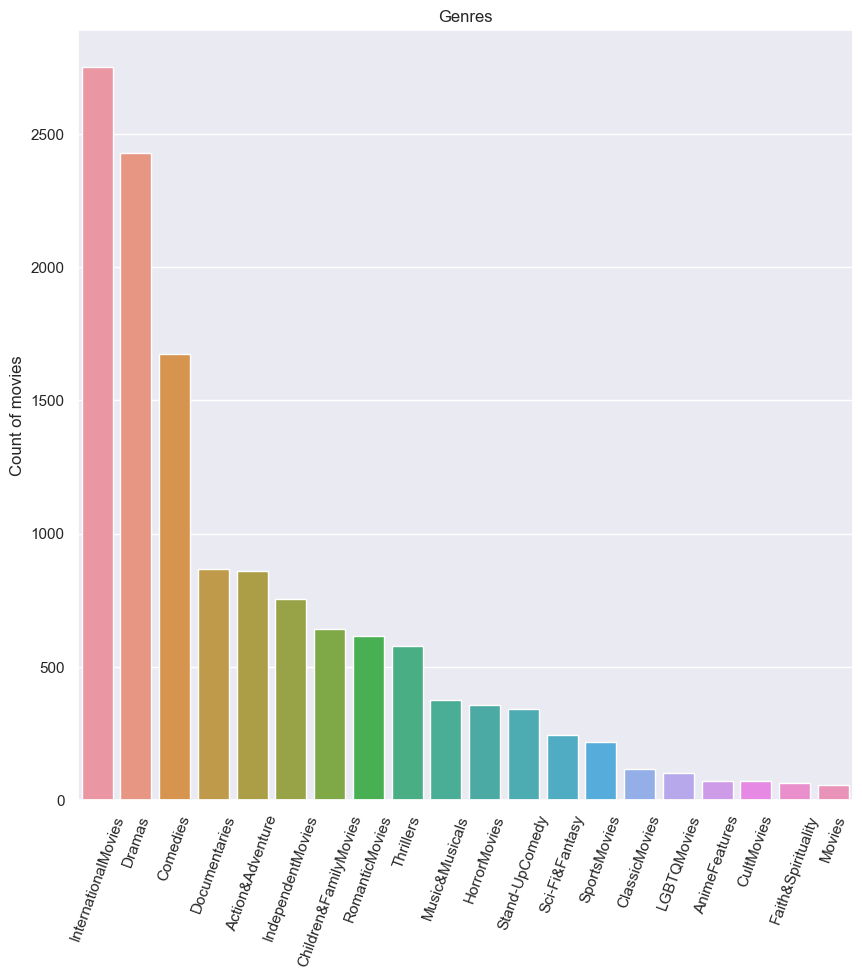

In [81]:
fig = plt.figure(figsize = (10, 10))
ax = sns.barplot(x=genre_names, y=genre_values)

ax.set_xticklabels(genre_names, rotation=70)
ax.set_ylabel("Count of movies")
ax.set_title("Genres");

# Анализ сериалов

In [82]:
netflix_shows.shape

(2676, 12)

In [83]:
netflix_shows.isna().sum()

show_id            0
type               0
title              0
director        2446
cast             350
country          391
date_added        10
release_year       0
rating             2
duration           0
listed_in          0
description        0
dtype: int64

In [84]:
netflix_shows['country'].fillna('Unknown', inplace = True)

In [85]:
netflix_shows.isna().sum()

show_id            0
type               0
title              0
director        2446
cast             350
country            0
date_added        10
release_year       0
rating             2
duration           0
listed_in          0
description        0
dtype: int64

In [86]:
netflix_shows['country'].value_counts()

United States                                    760
Unknown                                          391
United Kingdom                                   213
Japan                                            169
South Korea                                      158
                                                ... 
Belarus                                            1
United Kingdom, Australia                          1
France, Australia, Germany                         1
Australia, New Zealand, United States              1
United States, France, South Korea, Indonesia      1
Name: country, Length: 197, dtype: int64

In [114]:
countries_show = {}

cou = list(netflix_shows['country'])
for i in cou:
    i = i.replace(' ', '')
    i = list(i.split(','))
    
    for j in i:
        if j in list(countries_show.keys()):
            countries_show[j]+=1
        else:
            countries_show[j]=1



In [115]:
countries_show

{'SouthAfrica': 11,
 'Unknown': 391,
 'India': 84,
 'UnitedKingdom': 272,
 'UnitedStates': 938,
 'Mexico': 58,
 'Turkey': 30,
 'Australia': 66,
 'Finland': 4,
 'Nigeria': 9,
 'Japan': 199,
 'Belgium': 12,
 'France': 90,
 'SouthKorea': 170,
 'Spain': 61,
 'Singapore': 23,
 'Russia': 16,
 '': 1,
 'Ireland': 14,
 'Italy': 25,
 'Argentina': 20,
 'Jordan': 2,
 'Colombia': 32,
 'Israel': 11,
 'Taiwan': 70,
 'Germany': 44,
 'Canada': 126,
 'Poland': 9,
 'Thailand': 24,
 'NewZealand': 8,
 'Netherlands': 8,
 'Sweden': 11,
 'China': 48,
 'Iceland': 3,
 'Denmark': 14,
 'Philippines': 3,
 'Indonesia': 4,
 'UnitedArabEmirates': 1,
 'Norway': 9,
 'CzechRepublic': 6,
 'Lebanon': 7,
 'Brazil': 31,
 'Uruguay': 1,
 'Egypt': 15,
 'Luxembourg': 2,
 'Senegal': 1,
 'SaudiArabia': 4,
 'Kuwait': 3,
 'Belarus': 1,
 'Chile': 5,
 'Malta': 1,
 'PuertoRico': 1,
 'Austria': 1,
 'Cyprus': 1,
 'Malaysia': 8,
 'Mauritius': 1,
 'HongKong': 5,
 'Croatia': 1,
 'WestGermany': 2,
 'Syria': 1,
 'Hungary': 1,
 'Cuba': 1,
 'G

In [116]:
countries_fin2 = sorted(countries_show.items(), key=lambda item: countries_show[item[0]], reverse=True)
countries_fin2 = countries_fin2[:10]
countries_fin2

[('UnitedStates', 938),
 ('Unknown', 391),
 ('UnitedKingdom', 272),
 ('Japan', 199),
 ('SouthKorea', 170),
 ('Canada', 126),
 ('France', 90),
 ('India', 84),
 ('Taiwan', 70),
 ('Australia', 66)]

In [117]:
names = [name for name, value in countries_fin2]
names

['UnitedStates',
 'Unknown',
 'UnitedKingdom',
 'Japan',
 'SouthKorea',
 'Canada',
 'France',
 'India',
 'Taiwan',
 'Australia']

In [118]:
values = [value for name, value in countries_fin2]
values

[938, 391, 272, 199, 170, 126, 90, 84, 70, 66]

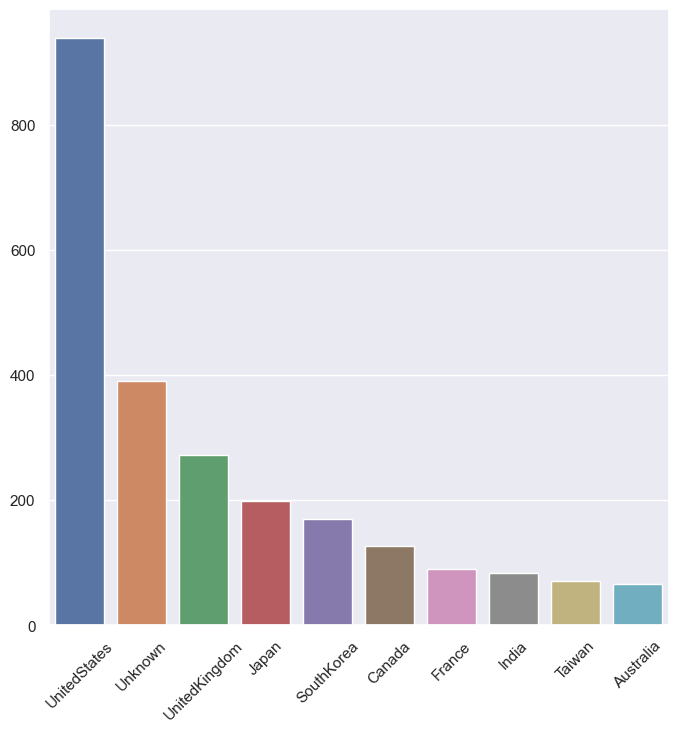

In [119]:
plt.figure(figsize=(8,8))
ax = sns.barplot(x=names, y=values)
ax.set_xticklabels(names, rotation=45);

# Сериалы с большим количеством сезонов

In [125]:
features = ['title', 'duration']
durations = netflix_shows[features]
durations

,title,duration
1,Blood & Water,2 Seasons
2,Ganglands,1 Season
3,Jailbirds New Orleans,1 Season
4,Kota Factory,2 Seasons
5,Midnight Mass,1 Season
...,...,...
8795,Yu-Gi-Oh! Arc-V,2 Seasons
8796,Yunus Emre,2 Seasons
8797,Zak Storm,3 Seasons
8800,Zindagi Gulzar Hai,1 Season


In [128]:
durations['no_of_seasons'] = durations['duration'].str.replace(' Season','')
durations

C:\Users\madiy\AppData\Local\Temp\ipykernel_13276\1690007643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  durations['no_of_seasons'] = durations['duration'].str.replace(' Season','')


,title,duration,number_of_sesons,no_of_seasons
1,Blood & Water,2 Seasons,2 Seaon,2s
2,Ganglands,1 Season,1 Seaon,1
3,Jailbirds New Orleans,1 Season,1 Seaon,1
4,Kota Factory,2 Seasons,2 Seaon,2s
5,Midnight Mass,1 Season,1 Seaon,1
...,...,...,...,...
8795,Yu-Gi-Oh! Arc-V,2 Seasons,2 Seaon,2s
8796,Yunus Emre,2 Seasons,2 Seaon,2s
8797,Zak Storm,3 Seasons,3 Seaon,3s
8800,Zindagi Gulzar Hai,1 Season,1 Seaon,1


In [130]:
durations['no_of_seasons'] = durations['no_of_seasons'].str.replace('s', '')
durations

C:\Users\madiy\AppData\Local\Temp\ipykernel_13276\334835126.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  durations['no_of_seasons'] = durations['no_of_seasons'].str.replace('s', '')


,title,duration,number_of_sesons,no_of_seasons
1,Blood & Water,2 Seasons,2 Seaon,2
2,Ganglands,1 Season,1 Seaon,1
3,Jailbirds New Orleans,1 Season,1 Seaon,1
4,Kota Factory,2 Seasons,2 Seaon,2
5,Midnight Mass,1 Season,1 Seaon,1
...,...,...,...,...
8795,Yu-Gi-Oh! Arc-V,2 Seasons,2 Seaon,2
8796,Yunus Emre,2 Seasons,2 Seaon,2
8797,Zak Storm,3 Seasons,3 Seaon,3
8800,Zindagi Gulzar Hai,1 Season,1 Seaon,1


str -> int

In [131]:
durations['no_of_seasons'] = durations['no_of_seasons'].astype(str).astype(int)
durations

C:\Users\madiy\AppData\Local\Temp\ipykernel_13276\1104603247.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  durations['no_of_seasons'] = durations['no_of_seasons'].astype(str).astype(int)


,title,duration,number_of_sesons,no_of_seasons
1,Blood & Water,2 Seasons,2 Seaon,2
2,Ganglands,1 Season,1 Seaon,1
3,Jailbirds New Orleans,1 Season,1 Seaon,1
4,Kota Factory,2 Seasons,2 Seaon,2
5,Midnight Mass,1 Season,1 Seaon,1
...,...,...,...,...
8795,Yu-Gi-Oh! Arc-V,2 Seasons,2 Seaon,2
8796,Yunus Emre,2 Seasons,2 Seaon,2
8797,Zak Storm,3 Seasons,3 Seaon,3
8800,Zindagi Gulzar Hai,1 Season,1 Seaon,1


In [132]:
durations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2676 entries, 1 to 8803
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             2676 non-null   object
 1   duration          2676 non-null   object
 2   number_of_sesons  2676 non-null   object
 3   no_of_seasons     2676 non-null   int32 
dtypes: int32(1), object(3)
memory usage: 94.1+ KB


In [137]:
t = ['title', 'no_of_seasons']
top = durations[t]

top = top.sort_values(by='no_of_seasons', ascending=False)

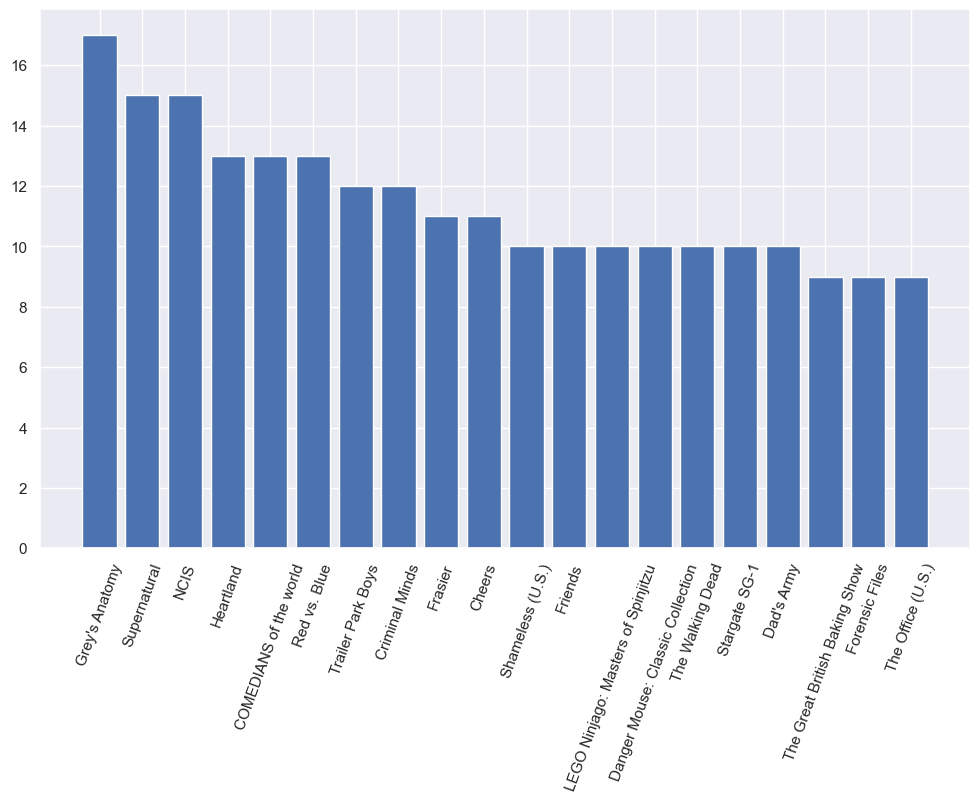

In [139]:
top20 = top[0:20]
plt.figure(figsize=(12,7))

plt.bar(top20['title'], top20['no_of_seasons'])
plt.xticks(top20['title'], rotation = 70);

In [140]:
bottom = top.sort_values(by='no_of_seasons')
bottom = bottom[20:50]

In [141]:
bottom

,title,no_of_seasons
1715,A Queen Is Born,1
3065,Messiah,1
2891,Gentefied,1
3063,Live Up To Your Name,1
3056,Chhota Bheem Kung Fu Dhamaka Series,1
3055,Cells at Work!,1
3053,Border Security: America's Front Line,1
3052,Because This Is My First Life,1
3050,Thieves of the Wood,1
3049,"Sex, Explained",1


# Анализ жанров сериала

In [142]:
netflix_shows['listed_in']

1         International TV Shows, TV Dramas, TV Mysteries
2       Crime TV Shows, International TV Shows, TV Act...
3                                  Docuseries, Reality TV
4       International TV Shows, Romantic TV Shows, TV ...
5                      TV Dramas, TV Horror, TV Mysteries
                              ...                        
8795                               Anime Series, Kids' TV
8796                    International TV Shows, TV Dramas
8797                                             Kids' TV
8800    International TV Shows, Romantic TV Shows, TV ...
8803               Kids' TV, Korean TV Shows, TV Comedies
Name: listed_in, Length: 2676, dtype: object

In [143]:
from collections import Counter

In [149]:
genres = list(netflix_shows['listed_in'])
gen = []

for i in genres:
    i = list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',''))
        
g = Counter(gen)        

In [156]:
g

[('InternationalTVShows', 1351),
 ('TVDramas', 763),
 ('TVComedies', 581),
 ('CrimeTVShows', 470),
 ("Kids'TV", 451),
 ('Docuseries', 395),
 ('RomanticTVShows', 370),
 ('RealityTV', 255),
 ('BritishTVShows', 253),
 ('AnimeSeries', 176),
 ('Spanish-LanguageTVShows', 174),
 ('TVAction&Adventure', 168),
 ('KoreanTVShows', 151),
 ('TVMysteries', 98),
 ('Science&NatureTV', 92),
 ('TVSci-Fi&Fantasy', 84),
 ('TVHorror', 75),
 ('TeenTVShows', 69),
 ('TVThrillers', 57),
 ('Stand-UpComedy&TalkShows', 56),
 ('Classic&CultTV', 28),
 ('TVShows', 16)]

In [153]:
g = sorted(g.items(),key = lambda item: g[item[0]], reverse = True)
g

[('InternationalTVShows', 1351),
 ('TVDramas', 763),
 ('TVComedies', 581),
 ('CrimeTVShows', 470),
 ("Kids'TV", 451),
 ('Docuseries', 395),
 ('RomanticTVShows', 370),
 ('RealityTV', 255),
 ('BritishTVShows', 253),
 ('AnimeSeries', 176),
 ('Spanish-LanguageTVShows', 174),
 ('TVAction&Adventure', 168),
 ('KoreanTVShows', 151),
 ('TVMysteries', 98),
 ('Science&NatureTV', 92),
 ('TVSci-Fi&Fantasy', 84),
 ('TVHorror', 75),
 ('TeenTVShows', 69),
 ('TVThrillers', 57),
 ('Stand-UpComedy&TalkShows', 56),
 ('Classic&CultTV', 28),
 ('TVShows', 16)]

In [154]:
genre_names = [name for name,value in g]
genre_names

['InternationalTVShows',
 'TVDramas',
 'TVComedies',
 'CrimeTVShows',
 "Kids'TV",
 'Docuseries',
 'RomanticTVShows',
 'RealityTV',
 'BritishTVShows',
 'AnimeSeries',
 'Spanish-LanguageTVShows',
 'TVAction&Adventure',
 'KoreanTVShows',
 'TVMysteries',
 'Science&NatureTV',
 'TVSci-Fi&Fantasy',
 'TVHorror',
 'TeenTVShows',
 'TVThrillers',
 'Stand-UpComedy&TalkShows',
 'Classic&CultTV',
 'TVShows']

In [157]:
genre_values = [value for name, value in g]
genre_values

[1351,
 763,
 581,
 470,
 451,
 395,
 370,
 255,
 253,
 176,
 174,
 168,
 151,
 98,
 92,
 84,
 75,
 69,
 57,
 56,
 28,
 16]

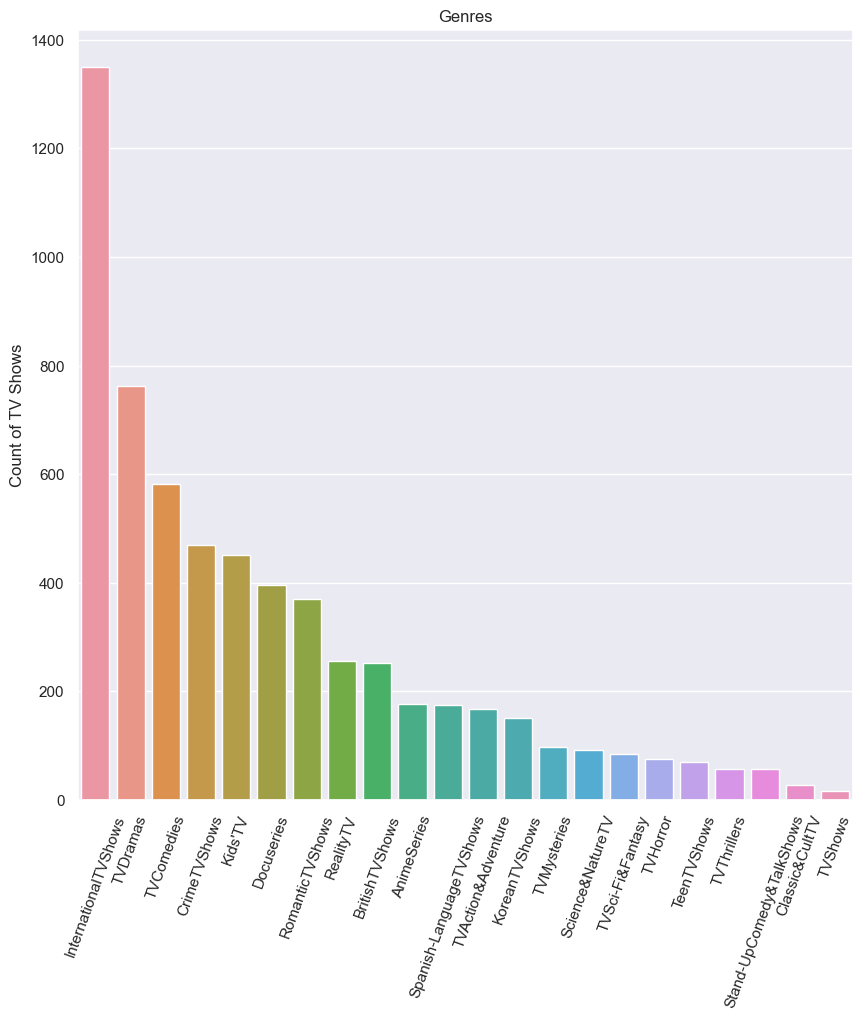

In [158]:
fig = plt.figure(figsize = (10, 10))
ax = sns.barplot(x=genre_names, y=genre_values)

ax.set_xticklabels(genre_names, rotation=70)
ax.set_ylabel("Count of TV Shows")
ax.set_title("Genres");

Интернациональные сериалы, драмы и комедии - топовые жанры.

In [159]:
durations[t]

,title,no_of_seasons
1,Blood & Water,2
2,Ganglands,1
3,Jailbirds New Orleans,1
4,Kota Factory,2
5,Midnight Mass,1
...,...,...
8795,Yu-Gi-Oh! Arc-V,2
8796,Yunus Emre,2
8797,Zak Storm,3
8800,Zindagi Gulzar Hai,1


C:\Users\madiy\AppData\Local\Temp\ipykernel_13276\3356407789.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=durations['no_of_seasons'], shade=True)


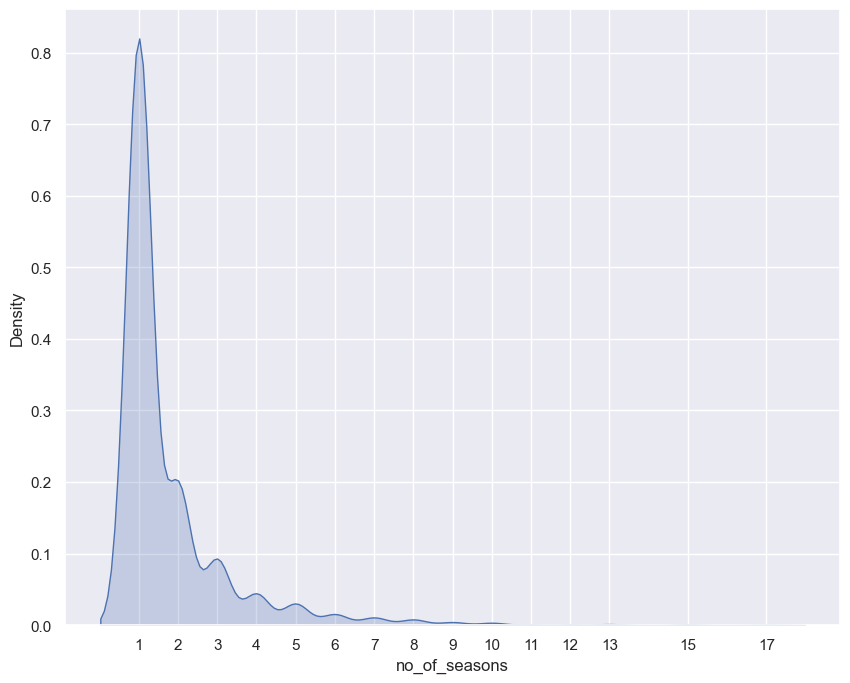

In [160]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 8))
sns.kdeplot(data=durations['no_of_seasons'], shade=True)
plt.xticks(sorted(durations['no_of_seasons'].unique()));

# System Reccomendation

In [162]:
netflix_movies['description']

0       As her father nears the end of his life, filmm...
6       Equestria's divided. But a bright-eyed hero be...
7       On a photo shoot in Ghana, an American model s...
9       A woman adjusting to life after a loss contend...
12      After most of her family is murdered in a terr...
                              ...                        
8801    Recovering alcoholic Talal wakes up inside a s...
8802    A political cartoonist, a crime reporter and a...
8804    Looking to survive in a world taken over by zo...
8805    Dragged from civilian life, a former superhero...
8806    A scrappy but poor boy worms his way into a ty...
Name: description, Length: 6131, dtype: object

In [168]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [169]:
tdidf = TfidfVectorizer(stop_words='english')
tdidf_matrix = tdidf.fit_transform(netflix_movies['description'])
tdidf_matrix

<6131x15483 sparse matrix of type '<class 'numpy.float64'>'
	with 84408 stored elements in Compressed Sparse Row format>

In [170]:
from sklearn.metrics.pairwise import cosine_similarity

In [171]:
cosine_sim = cosine_similarity(tdidf_matrix,tdidf_matrix)
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.01624469,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.03650444],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.01624469, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.03650444, ..., 0.        , 0.        ,
        1.        ]])

In [172]:
cosine_sim.shape

(6131, 6131)

In [174]:
indices = pd.Series(netflix_movies.index, index=netflix_movies['title']).drop_duplicates()
indices

title
Dick Johnson Is Dead                   0
My Little Pony: A New Generation       6
Sankofa                                7
The Starling                           9
Je Suis Karl                          12
                                    ... 
Zinzana                             8801
Zodiac                              8802
Zombieland                          8804
Zoom                                8805
Zubaan                              8806
Length: 6131, dtype: int64

In [175]:
cosine_sim_df = pd.DataFrame(cosine_sim)

cosine_sim_df.columns = indices.index

cosine_sim_df['title'] = indices.index
cosine_sim_df = cosine_sim_df.set_index('title')

cosine_sim_df.head()

title,Dick Johnson Is Dead,My Little Pony: A New Generation,Sankofa,The Starling,Je Suis Karl,Confessions of an Invisible Girl,Europe's Most Dangerous Man: Otto Skorzeny in Spain,Intrusion,Avvai Shanmughi,Go! Go! Cory Carson: Chrissy Takes the Wheel,...,Young Tiger,"Yours, Mine and Ours",اشتباك,Zed Plus,Zenda,Zinzana,Zodiac,Zombieland,Zoom,Zubaan
title,,,,,,,,,,,,,,,,,,,,,
Dick Johnson Is Dead,1.000000,0.0,0.0,0.018285,0.000000,0.0,0.014848,0.0,0.023927,0.0,...,0.0,0.02889,0.0,0.0,0.0,0.0,0.0,0.000000,0.016245,0.000000
My Little Pony: A New Generation,0.000000,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
Sankofa,0.000000,0.0,1.0,0.000000,0.000000,0.0,0.000000,0.0,0.029736,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.036504
The Starling,0.018285,0.0,0.0,1.000000,0.029133,0.0,0.016294,0.0,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.061674,0.017826,0.045998
Je Suis Karl,0.000000,0.0,0.0,0.029133,1.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.028473


In [178]:
indices

title
Dick Johnson Is Dead                   0
My Little Pony: A New Generation       6
Sankofa                                7
The Starling                           9
Je Suis Karl                          12
                                    ... 
Zinzana                             8801
Zodiac                              8802
Zombieland                          8804
Zoom                                8805
Zubaan                              8806
Length: 6131, dtype: int64

In [180]:
def get_recommendations(title, cosine_sim=cosine_sim_df):
    idx = indices[title]
    
    sim_scores = list(enumerate(cosine_sim_df.loc[title]))
    
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
   
    movie_indices = [i[0] for i in sim_scores]

    return netflix_movies['title'].iloc[movie_indices]

In [184]:
netflix_movies[netflix_movies['title'] == 'Last Breath'].description.iloc[0]

'A commercial diver becomes trapped on the ocean floor with dwindling oxygen and little hope of a timely rescue, so he tries to save himself.'

In [185]:
get_recommendations('Last Breath')

7061                                          In The Deep
940                        Motu Patlu: Deep Sea Adventure
2703                                               Mine 9
6466                                       Chicken Little
7616                               NOVA: Thai Cave Rescue
636                                          The Ice Road
5773    My Little Pony Equestria Girls: Legend of Ever...
4616                                          Big Miracle
895                                                Oxygen
3070                                              Posesif
Name: title, dtype: object

In [186]:
netflix_movies[netflix_movies['title']=='In The Deep'].description.iloc[0]

'With little oxygen left in their scuba tanks, two sisters are trapped in a shark cage at the bottom of the ocean while great whites circle nearby.'

In [187]:
netflix_movies[netflix_movies['title']=='Chicken Little'].description.iloc[0]

"No one believes Chicken Little when he tries to warn of an alien invasion – so it's up to him and his misfit friends to save the world!"

In [189]:
cosine_sim_df['Last Breath'].sort_values(ascending=False)

title
Last Breath                       1.000000
In The Deep                       0.263331
Motu Patlu: Deep Sea Adventure    0.193887
Mine 9                            0.152162
Chicken Little                    0.141503
                                    ...   
The Lovers                        0.000000
Seth Meyers: Lobby Baby           0.000000
Luccas Neto in: Summer Camp       0.000000
Shadow                            0.000000
Zubaan                            0.000000
Name: Last Breath, Length: 6131, dtype: float64